In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Read the dataset

In [2]:
newdf=df=pd.read_excel('Volve production data.xlsx')

In [3]:
newdf.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [4]:
#Roundinf off the data to the nearest integer
newdf = np.round(newdf)
newdf.isnull().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [5]:
newdf.columns.unique()

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [6]:
#Dropping unnecessary features: WELL_BORE_CODE, NPD_WELL_BORE_NAME, NPD_FIELD_NAME, NPD_FIELD_CODE,NPD_FACILITY_CODE,NPD_FACILITY_NAME

to_drop = ["WELL_BORE_CODE", "NPD_WELL_BORE_NAME", "NPD_FIELD_NAME", "NPD_FIELD_CODE", "NPD_FACILITY_CODE", "NPD_FACILITY_NAME","AVG_DOWNHOLE_PRESSURE", "AVG_DP_TUBING","BORE_WI_VOL","AVG_CHOKE_UOM","FLOW_KIND","WELL_TYPE","BORE_GAS_VOL"]
newdf = newdf.drop(to_drop, axis=1)
#print(newdf.info())

In [7]:
#Data is highly skewed and depends on the well,hence i have used padding to fill the missing values 
for i in newdf.columns.unique():
    newdf[i]=newdf[i].fillna(method='pad')

In [8]:
newdf.isnull().sum()

DATEPRD                     0
NPD_WELL_BORE_CODE          0
ON_STREAM_HRS               0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_WAT_VOL                0
dtype: int64

In [9]:
#Scaling dataset to remove difference in distributions within columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

newdf[['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P']] =scaler.fit_transform(newdf[['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P']])


In [10]:
#Taking the data of wells 2 to 4 since they were the ones with the east number of missing values
fdf = newdf.loc[746 : 8022]


In [11]:
fdf

,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_TEMPERATURE,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_WAT_VOL
746,2013-07-08,7078,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0
747,2013-07-09,7078,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0
748,2013-07-10,7078,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0
749,2013-07-11,7078,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0
750,2013-07-12,7078,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8018,2016-09-13,5351,0.0,0.0,0.366667,0.01,0.080292,0.0,9.0,0.0,0.0
8019,2016-09-14,5351,0.0,0.0,0.366667,0.01,0.080292,0.0,9.0,0.0,0.0
8020,2016-09-15,5351,0.0,0.0,0.366667,0.01,0.080292,0.0,9.0,0.0,0.0
8021,2016-09-16,5351,0.0,0.0,0.366667,0.01,0.080292,0.0,9.0,0.0,0.0


In [12]:
X = fdf.drop(['BORE_OIL_VOL'],axis=1)
y= fdf[['BORE_OIL_VOL','NPD_WELL_BORE_CODE']]

#Applying Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

reg_all = LinearRegression()

In [13]:
x_train_final = X_train.drop(['DATEPRD','NPD_WELL_BORE_CODE'],axis = 1)
x_test_final = X_test.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

In [14]:
y_test_final = y_test['BORE_OIL_VOL']
y_train_final = y_train['BORE_OIL_VOL']

In [15]:
X = fdf.drop(['DATEPRD','BORE_OIL_VOL'],axis=1).values
y= fdf['BORE_OIL_VOL']

In [16]:
x_train_final

,ON_STREAM_HRS,AVG_DOWNHOLE_TEMPERATURE,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_WAT_VOL
3374,0.96,0.000000,0.433333,1.00,0.248175,0.978723,5.0,4663.0
3760,0.96,0.000000,0.500000,1.00,0.240876,0.968085,4.0,4630.0
2900,0.96,0.000000,0.766667,0.56,0.350365,0.936170,16.0,3784.0
2090,0.96,0.972477,0.400000,0.50,0.605839,0.840426,49.0,7.0
7782,0.96,0.917431,0.466667,0.94,0.211679,0.925532,2.0,3346.0
...,...,...,...,...,...,...,...,...
5937,0.96,0.972477,0.000000,0.62,0.335766,0.968085,13.0,3374.0
5972,0.96,0.972477,0.000000,1.00,0.299270,0.957447,9.0,3359.0
6136,0.92,0.954128,0.000000,0.57,0.306569,0.946809,12.0,4301.0
1606,0.96,0.972477,0.366667,1.00,0.233577,0.861702,5.0,2145.0


In [17]:
reg_all.fit(x_train_final, y_train_final)

LinearRegression()

In [18]:
print("The R2 value for linear regression for oil volume production is", reg_all.score(x_test_final, y_test_final))

The R2 value for linear regression for oil volume production is 0.5542109655694198


In [19]:
importance = reg_all.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 1338.07639
Feature: 1, Score: 280.89200
Feature: 2, Score: -1194.43707
Feature: 3, Score: 48.02134
Feature: 4, Score: 506.57085
Feature: 5, Score: 2572.30477
Feature: 6, Score: 13.05541
Feature: 7, Score: -0.40973


In [20]:
reg_all.coef_

array([ 1.33807639e+03,  2.80892004e+02, -1.19443707e+03,  4.80213352e+01,
        5.06570847e+02,  2.57230477e+03,  1.30554129e+01, -4.09730530e-01])

In [21]:
reg_all.intercept_

-1110.7026986608469

## Correlation from Linear Regression

In [22]:

print("The Correlation from linear model is: BORE_OIL_VOL = {:.5} + {:.5}*ON_STREAM_HRS + {:.5}*AVG_DOWNHOLE_TEMPERATURE  {:.5}*AVG_ANNULUS_PRESS + {:.5}*AVG_CHOKE_SIZE_P + {:.5}*AVG_WHP_P + {:.5}*AVG_WHT_P + {:.5}*DP_CHOKE_SIZE {:.5}*BORE_WAT_".format(reg_all.intercept_, reg_all.coef_[0], reg_all.coef_[1], reg_all.coef_[2],reg_all.coef_[3], reg_all.coef_[4], reg_all.coef_[5], reg_all.coef_[6], reg_all.coef_[7]))


The Correlation from linear model is: BORE_OIL_VOL = -1110.7 + 1338.1*ON_STREAM_HRS + 280.89*AVG_DOWNHOLE_TEMPERATURE  -1194.4*AVG_ANNULUS_PRESS + 48.021*AVG_CHOKE_SIZE_P + 506.57*AVG_WHP_P + 2572.3*AVG_WHT_P + 13.055*DP_CHOKE_SIZE -0.40973*BORE_WAT_


## Polynomial

## Now we will try for improving our Project by using Polynomial Regression.

####  Polynomial Regression: Linear regression model assumes the linear relationship between the Oil Production and the features. But as we know that the relationship is not that simple and the model is underfitting, So, for solving this problem and getting a more accurate correlation Polynomial Regression comes in picture. Basically, we will convert our features into their higher orders and then apply linear regression on these high order feature terms.

### So, we will use PolynomialFeatures() function from the scikit learn library for converting features into high order features.

In [23]:
# Applying Polynomisl Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train_final)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train_final)
x_pol_test = poly_reg.fit_transform(x_test_final)
X_poly.shape



#print("The R2 value for Ridge regression for oil volume production is",ridge.score(x_test_final, y_test_final))

(5093, 495)

In [24]:

a =np.array(poly_reg.get_feature_names(['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE' ,'BORE_WAT_VOL']))
print(len(a))

495


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
a

array(['1', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_TEMPERATURE',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_WAT_VOL', 'ON_STREAM_HRS^2',
       'ON_STREAM_HRS AVG_DOWNHOLE_TEMPERATURE',
       'ON_STREAM_HRS AVG_ANNULUS_PRESS',
       'ON_STREAM_HRS AVG_CHOKE_SIZE_P', 'ON_STREAM_HRS AVG_WHP_P',
       'ON_STREAM_HRS AVG_WHT_P', 'ON_STREAM_HRS DP_CHOKE_SIZE',
       'ON_STREAM_HRS BORE_WAT_VOL', 'AVG_DOWNHOLE_TEMPERATURE^2',
       'AVG_DOWNHOLE_TEMPERATURE AVG_ANNULUS_PRESS',
       'AVG_DOWNHOLE_TEMPERATURE AVG_CHOKE_SIZE_P',
       'AVG_DOWNHOLE_TEMPERATURE AVG_WHP_P',
       'AVG_DOWNHOLE_TEMPERATURE AVG_WHT_P',
       'AVG_DOWNHOLE_TEMPERATURE DP_CHOKE_SIZE',
       'AVG_DOWNHOLE_TEMPERATURE BORE_WAT_VOL', 'AVG_ANNULUS_PRESS^2',
       'AVG_ANNULUS_PRESS AVG_CHOKE_SIZE_P',
       'AVG_ANNULUS_PRESS AVG_WHP_P', 'AVG_ANNULUS_PRESS AVG_WHT_P',
       'AVG_ANNULUS_PRESS DP_CHOKE_SIZE',
       'AVG_ANNULUS_PRESS BORE_WAT_VOL', 'AVG_CH

In [26]:
b = np.array(lin_reg.coef_)
Correlation_Poly = pd.DataFrame({'Coefficients':b, 'Feature Name':a})

In [27]:
pd.set_option('display.max_rows',30)


In [28]:
Correlation_Poly.head(30)

,Coefficients,Feature Name
0,51.272236,1
1,98.312136,ON_STREAM_HRS
2,-2.268094,AVG_DOWNHOLE_TEMPERATURE
3,-33.306440,AVG_ANNULUS_PRESS
4,75.994927,AVG_CHOKE_SIZE_P
5,21.827586,AVG_WHP_P
6,49.877757,AVG_WHT_P
7,-15.096760,DP_CHOKE_SIZE
8,24.140095,BORE_WAT_VOL
9,89.849271,ON_STREAM_HRS^2


In [29]:
lin_reg.intercept_


-90.760521889458

In [30]:
# get importance
importance = lin_reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 51.27224
Feature: 1, Score: 98.31214
Feature: 2, Score: -2.26809
Feature: 3, Score: -33.30644
Feature: 4, Score: 75.99493
Feature: 5, Score: 21.82759
Feature: 6, Score: 49.87776
Feature: 7, Score: -15.09676
Feature: 8, Score: 24.14009
Feature: 9, Score: 89.84927
Feature: 10, Score: 45.14038
Feature: 11, Score: 32.17981
Feature: 12, Score: 92.25645
Feature: 13, Score: 15.62979
Feature: 14, Score: 59.31852
Feature: 15, Score: 10.67192
Feature: 16, Score: -17.55559
Feature: 17, Score: -14.04028
Feature: 18, Score: -25.09581
Feature: 19, Score: 31.53587
Feature: 20, Score: -3.99209
Feature: 21, Score: -15.56662
Feature: 22, Score: 57.51739
Feature: 23, Score: -17.39006
Feature: 24, Score: -57.29987
Feature: 25, Score: 31.01790
Feature: 26, Score: 0.31198
Feature: 27, Score: -14.12295
Feature: 28, Score: 70.95471
Feature: 29, Score: -7.31532
Feature: 30, Score: 72.43979
Feature: 31, Score: 19.13292
Feature: 32, Score: 71.81763
Feature: 33, Score: -7.77017
Feature: 34, Sco

<BarContainer object of 495 artists>

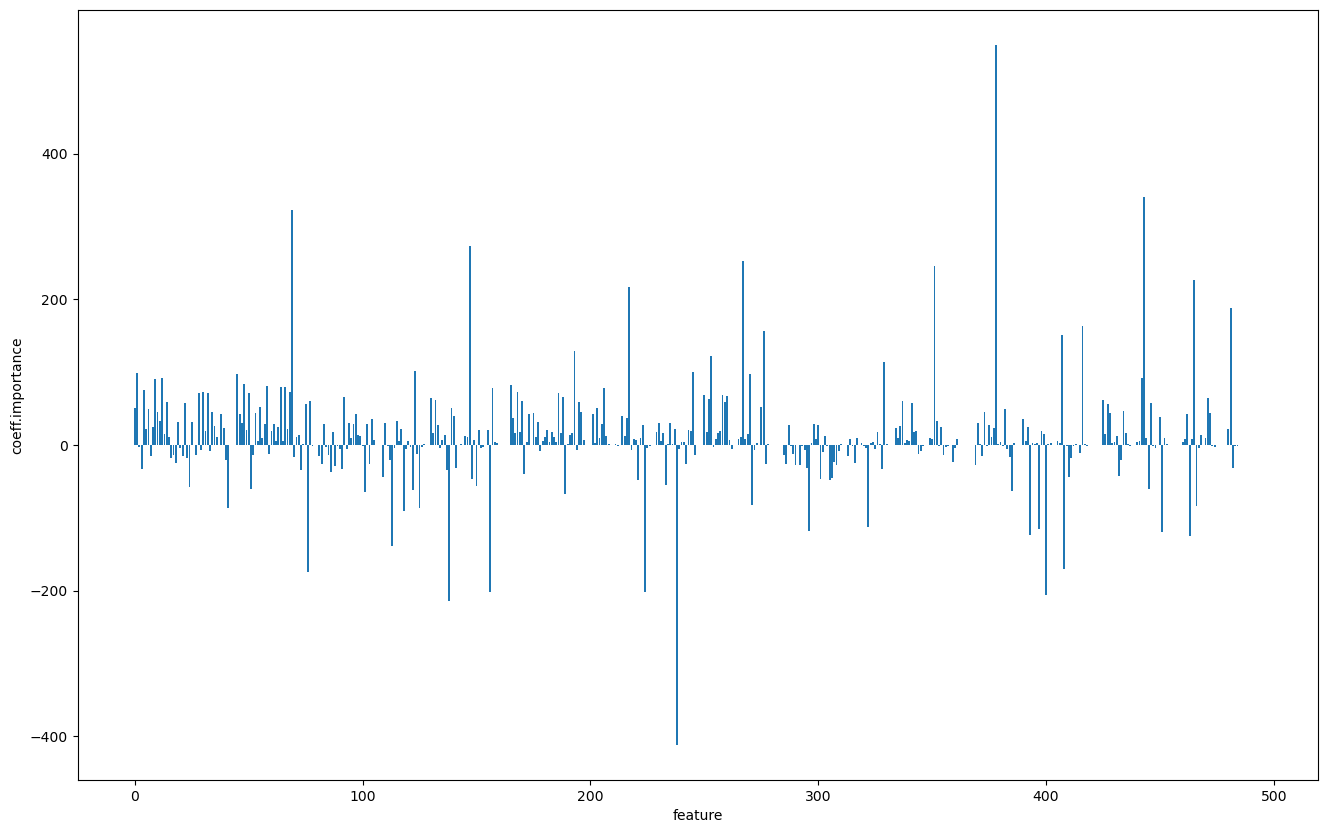

In [31]:
plt.figure(figsize=(16,10))
plt.xlabel('feature')
plt.ylabel('coeff.importance')
plt.bar([x for x in range(len(importance))],importance)

In [32]:
y_pred = lin_reg.predict(x_pol_test)

In [33]:
y_pred = lin_reg.predict(x_pol_test)
print("The R2 value for Polynomial regression(4th order) for oil volume production is",lin_reg.score(x_pol_test, y_test_final))


The R2 value for Polynomial regression(4th order) for oil volume production is 0.9572677127294039


In [34]:
df = pd.DataFrame({'Real Values':y_test_final, 'Predicted Values':y_pred})
df.head(50)

,Real Values,Predicted Values
6805,643.0,494.551610
6756,613.0,230.907763
5221,4634.0,4416.488183
4435,688.0,651.846172
5261,3571.0,3576.853894
...,...,...
6176,928.0,1597.373273
4404,719.0,617.061145
4942,0.0,-104.375574
3628,575.0,506.797480


In [35]:
X_test.head()

,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_TEMPERATURE,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_WAT_VOL
6805,2013-05-14,5351,0.64,0.844037,0.7,0.64,0.248175,0.882979,6.0,2845.0
6756,2013-03-22,5351,0.72,0.926606,0.6,0.42,0.284672,0.819149,11.0,2199.0
5221,2008-10-25,5351,0.96,0.963303,0.0,0.45,0.459854,0.819149,30.0,1.0
4435,2015-04-05,5599,0.96,0.000000,0.9,0.35,0.350365,0.787234,20.0,692.0
5261,2008-12-04,5351,0.96,0.963303,0.0,0.36,0.583942,0.797872,47.0,2.0


In [36]:
X_test.groupby(['NPD_WELL_BORE_CODE']).count()

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_TEMPERATURE,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_WAT_VOL
NPD_WELL_BORE_CODE,,,,,,,,,
5351,910,910,910,910,910,910,910,910,910
5599,914,914,914,914,914,914,914,914,914
7078,360,360,360,360,360,360,360,360,360


In [37]:
## Basic Import 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor



In [38]:
def evaluvate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [47]:
models={
   "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
    
model_list=[]
r2_list=[]

for i in range(len(models.values())):
    model=list(models.values())[i]
    model.fit(x_train_final,y_train_final)
    ## Make prediction 
    y_train_pred=model.predict(x_train_final)
    y_test_pred=model.predict(x_test_final)
    
    model_train_mae,model_train_rmse,model_train_r2=evaluvate_model(y_train_final,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluvate_model(y_test_final,y_test_pred)
    
    print(list(models.values())[i])
    model_list.append(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    

LinearRegression()
Model performance for Training set
- Root Mean Squared Error: 937.6000
- Mean Absolute Error: 722.5741
- R2 Score: 0.5504
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 913.7679
- Mean Absolute Error: 706.1910
- R2 Score: 0.5542


Lasso()
Model performance for Training set
- Root Mean Squared Error: 937.8194
- Mean Absolute Error: 721.8471
- R2 Score: 0.5502
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 913.8379
- Mean Absolute Error: 705.3111
- R2 Score: 0.5541


Ridge()
Model performance for Training set
- Root Mean Squared Error: 937.6083
- Mean Absolute Error: 722.6768
- R2 Score: 0.5504
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 913.8429
- Mean Absolute Error: 706.3514
- R2 Score: 0.5541


KNeighborsRegressor()
Model performance for Training set
- Root Mean Squared Error: 679.8064
- Mean Absolute Error: 373.1869
- R2 Scor

In [48]:
df_results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
df_results

,Model Name,R2_Score
7,CatBoosting Regressor,0.987850
6,XGBRegressor,0.985370
5,Random Forest Regressor,0.985258
4,Decision Tree,0.970805
8,AdaBoost Regressor,0.894905
3,K-Neighbors Regressor,0.644222
0,Linear Regression,0.554211
1,Lasso,0.554143
2,Ridge,0.554138


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Hyperparameter tuning</p>

## Tunning CatboostRegressor

In [65]:
# Intialize Catboost Regressor
cbr = CatBoostRegressor(verbose=False)

## Creating Hyper Parameter Tuning Grid
param_dist = {'depth'          : [4,5,6,7,8,9, 10],
              'learning_rate' : [0.01,0.02,0.03,0.04],
               'iterations'    : [300,400,500,600]}
# Intiate RandomSearchCV grid
rscv = RandomizedSearchCV(cbr , param_dist, scoring='r2', cv =5, n_jobs=-1)

# Fit The MODEL
rscv.fit(x_train_final,y_train_final)

# Print the tuned parameters and score
print(rscv.best_params_)
print(rscv.best_score_)


{'learning_rate': 0.04, 'iterations': 500, 'depth': 10}
0.9863926560928874


In [75]:
## Definition of print evaluvated model result
def print_evaluated_model_result(model,xtrain,ytrain,xtest,ytest):
    
    ytrain_pred = model.predict(xtrain)
    ytest_pred = model.predict(xtest)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluvate_model(ytrain, ytrain_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluvate_model(ytest, ytest_pred)

    # Printing results
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    

In [76]:
# Selecting best model
best_cbr = rscv.best_estimator_

# Evaluate Train and Test dataset
print_evaluated_model_result(best_cbr,x_train_final,y_train_final,x_test_final,y_test_final)

Model performance for Training set
- Root Mean Squared Error: 90.6042
- Mean Absolute Error: 59.0328
- R2 Score: 0.9958
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 149.2946
- Mean Absolute Error: 86.3162
- R2 Score: 0.9881


## Actual vs Predicted Production plot for the Well No:5599

## Catboost Regressor

The R2 value for catboost regression for oil volume production in well 5599 is 0.9883561891231595


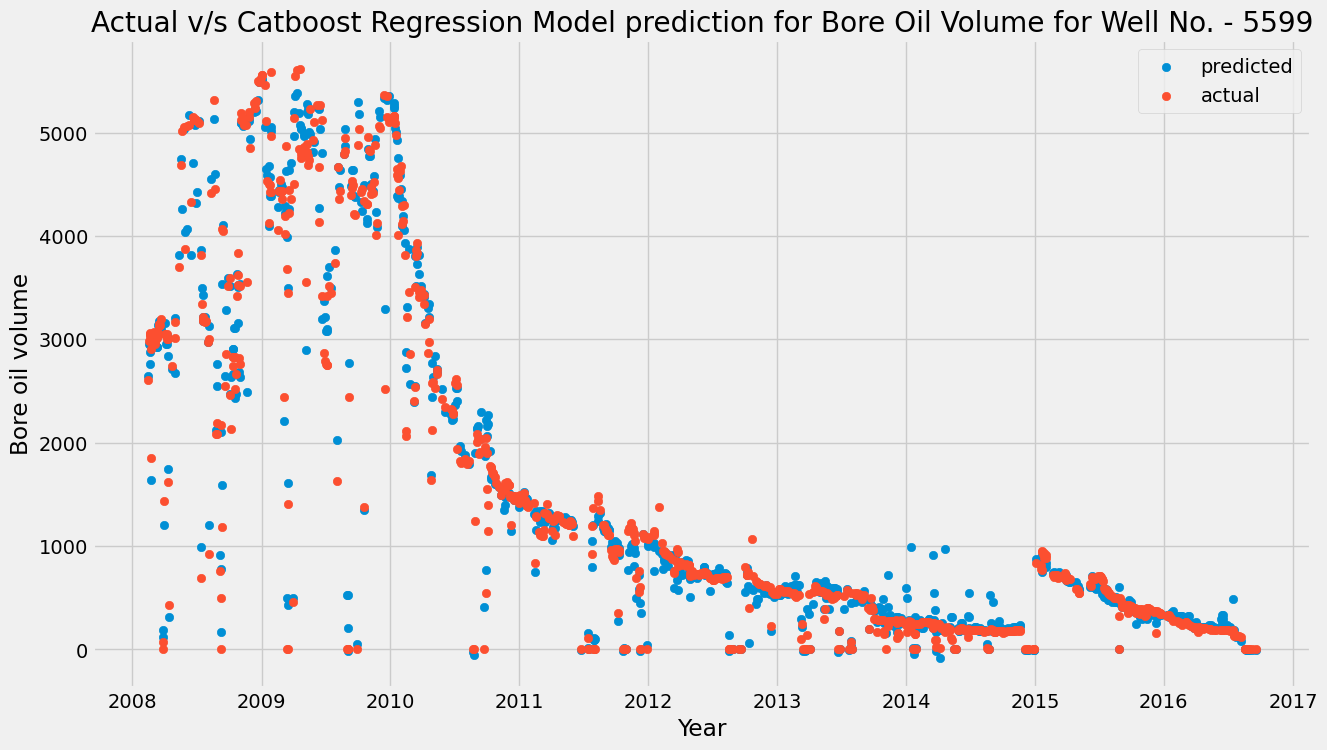

In [107]:
x_test_5599=X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]
y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = x_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)
y_pred_5599=best_cbr.predict(x_test_5599final)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(x_test_5599["DATEPRD"].tolist(),y_pred_5599,label='predicted')
plt.scatter(x_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Catboost Regression Model prediction for Bore Oil Volume for Well No. - 5599')

y_test_5599_final = y_test_5599['BORE_OIL_VOL']
print("The R2 value for catboost regression for oil volume production in well 5599 is",r2_score(y_test_5599_final,y_pred_5599))


## Actual vs Model Prediction Plot for well No: 5351

The R2 value for catboost regression for oil volume production in well 5351 is 0.9890547395802347


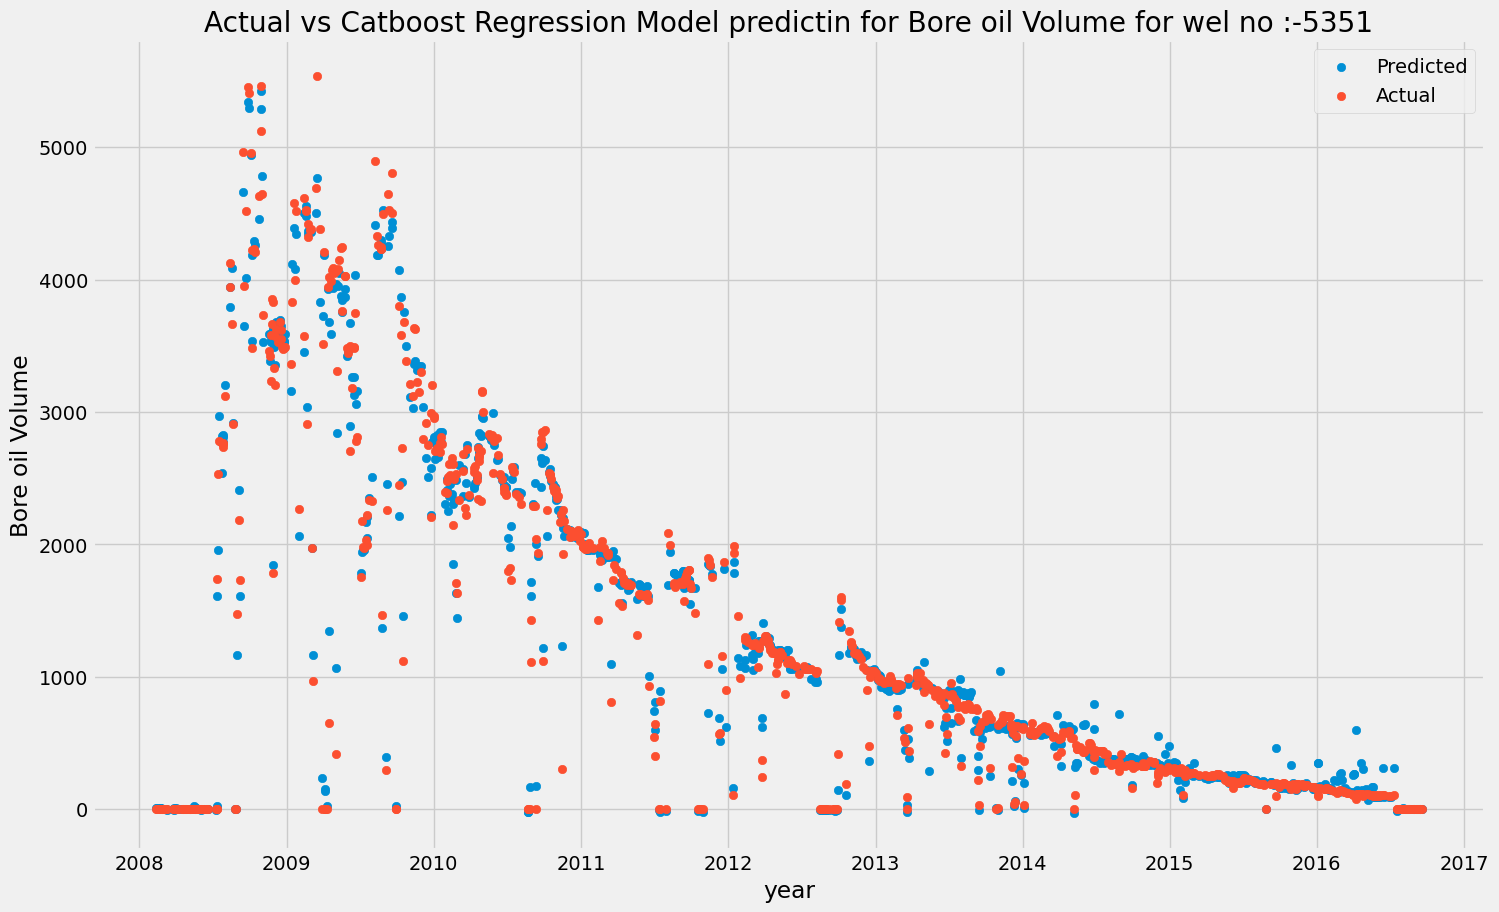

In [109]:
x_test_5351=X_test[X_test["NPD_WELL_BORE_CODE"]==5351]
y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]


x_test_5351_final=x_test_5351.drop(columns=['DATEPRD',"NPD_WELL_BORE_CODE"])

y_pred_5351=best_cbr.predict(x_test_5351_final)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,10))
plt.scatter(x_test_5351['DATEPRD'],y_pred_5351,label='Predicted')
plt.scatter(x_test_5351['DATEPRD'],y_test_5351['BORE_OIL_VOL'],label='Actual')
plt.legend()
plt.xlabel('year')
plt.ylabel('Bore oil Volume')
y_test_5351_final=y_test_5351['BORE_OIL_VOL']
plt.title('Actual vs Catboost Regression Model predictin for Bore oil Volume for wel no :-5351')
print("The R2 value for catboost regression for oil volume production in well 5351 is",r2_score(y_test_5351_final,y_pred_5351))

## Actual V/S Model Prediction plot for Well No.- 7078

The R2 value for catboost regression for oil volume production in well 7078 is 0.9371553094719041


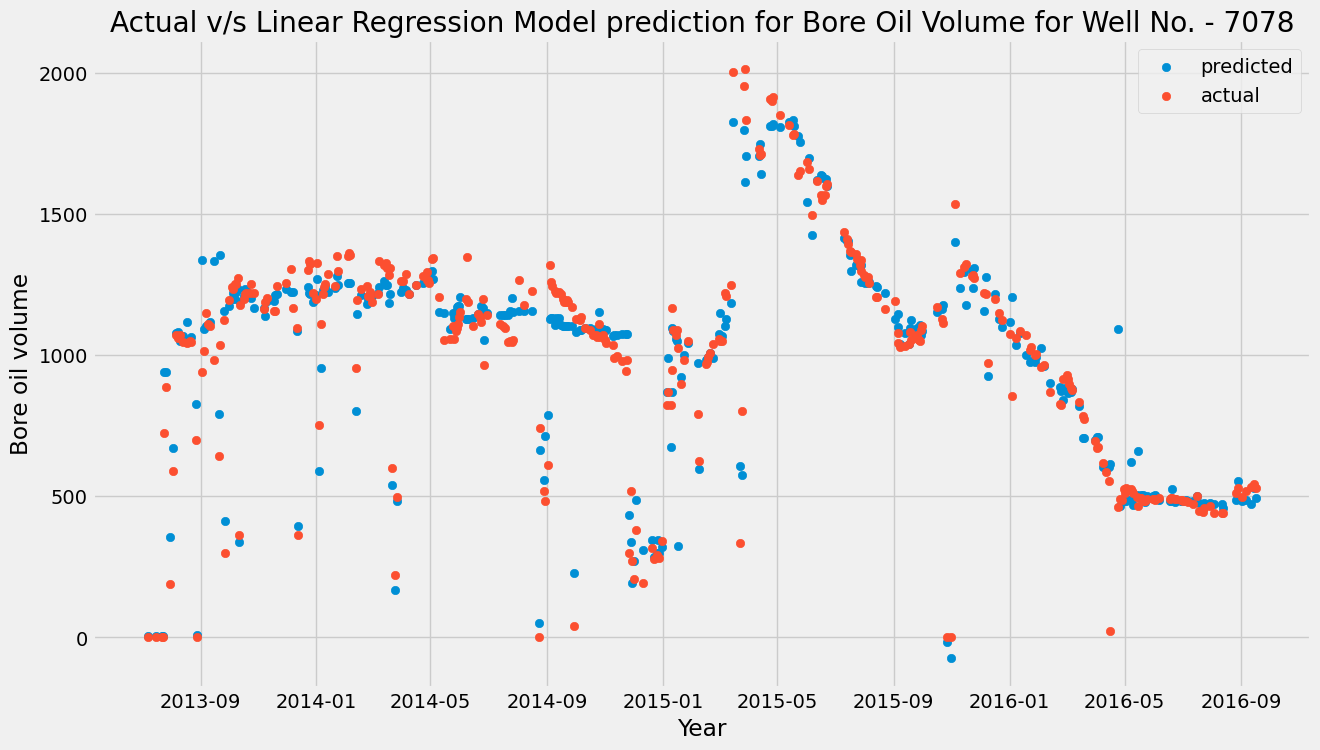

In [112]:
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]

y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred_7078 = best_cbr.predict(x_test_7078final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_test_7078['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 7078')
y_test_7078_final=y_test_7078['BORE_OIL_VOL']
print("The R2 value for catboost regression for oil volume production in well 7078 is",r2_score(y_test_7078_final,y_pred_7078))